# Первая часть домашнего задания по SQL

## Реализовать на python базу данных по персоналу с двумя таблицами из занятия. Заполнить ее данными.


In [1]:
import sqlite3


In [2]:
sqlite_connection = sqlite3.connect("sql_workers.db")
cursor = sqlite_connection.cursor()
print("База данных создана")

База данных создана


In [3]:
sql_create_table_workers = "create table Workers(id int, name varchar(20), surname varchar(20), department_id int, salary int)"
cursor.execute(sql_create_table_workers)

OperationalError: table Workers already exists

In [6]:
cursor.fetchall()

[]

In [7]:
cursor.execute("""
insert into Workers(id, name, surname, department_id, salary)
values
(1, "Иван", "Иванов", 1, 5000),
(2, "Светлана", "Сидорова", 1, 4500),
(3, "Илья", "Макаров", 2, 4500),
(4, "Марина", "Федорова", 2, 6000),
(5, "Вадим", "Ильин", 3, 7000),
(6, "Илья", "Филатов", 4, 5500),
(7, "Марина", "Сидорова", 2, 9000),
(8, "Вадим", "Ильин", 3, 7000)
""")
cursor.fetchall()

[]

In [8]:
cursor.execute("select * from Workers")
cursor.fetchall()

[(1, 'Иван', 'Иванов', 1, 5000),
 (2, 'Светлана', 'Сидорова', 1, 4500),
 (3, 'Илья', 'Макаров', 2, 4500),
 (4, 'Марина', 'Федорова', 2, 6000),
 (5, 'Вадим', 'Ильин', 3, 7000),
 (6, 'Илья', 'Филатов', 4, 5500),
 (7, 'Марина', 'Сидорова', 2, 9000),
 (8, 'Вадим', 'Ильин', 3, 7000)]

In [9]:
sql_create_table_department = "create table Department(id int, name varchar(20))"
cursor.execute(sql_create_table_department)

In [13]:
cursor.execute("""
insert into Department(id, name) 
values
(1, "Маркетинг"),
(2, "Продажи"),
(3, "Бухгалтерия")
""")
cursor.fetchall()

[]

In [14]:
cursor.execute("select * from Department")
cursor.fetchall()

[(1, 'Маркетинг'), (2, 'Продажи'), (3, 'Бухгалтерия')]

## Написать select который вернет таблицу содержащую названия отделов, среднюю зарплату в отдел, отсортированных по убыванию средне зп.


In [17]:
cursor.execute("""
select Department.name as "Департамент", avg(salary)
from Workers
join Department on Workers.department_id = Department.id
group by department_id
order by avg(salary) desc
""")
cursor.fetchall()

[('Бухгалтерия', 7000.0), ('Продажи', 6500.0), ('Маркетинг', 4750.0)]

## Добавить в первый отдел еще одно сотрудника с ЗП 1000 и посмотреть как изменится результат.

In [18]:
cursor.execute("""
insert into Workers(id, name, surname, department_id, salary)
values
(9, "Марк", "Иванов", 1, 1000)
""")
cursor.fetchall()

[]

In [19]:
cursor.execute("""select Department.name as "Департамент", avg(salary)
from Workers
join Department on Workers.department_id = Department.id
group by department_id
order by avg(salary) desc
""")
cursor.fetchall()

[('Бухгалтерия', 7000.0), ('Продажи', 6500.0), ('Маркетинг', 3500.0)]

In [20]:
sqlite_connection.close()

In [9]:
cursor.execute("""SELECT * FROM Workers""")
cursor.fetchall()

[(1, 'Иван', 'Иванов', 1, 5000),
 (2, 'Светлана', 'Сидорова', 1, 4500),
 (3, 'Илья', 'Макаров', 2, 4500),
 (4, 'Марина', 'Федорова', 2, 6000),
 (5, 'Вадим', 'Ильин', 3, 7000),
 (6, 'Илья', 'Филатов', 4, 5500),
 (7, 'Марина', 'Сидорова', 2, 9000),
 (8, 'Вадим', 'Ильин', 3, 7000)]

## Дополнительное задание по работникам

In [10]:
cursor.execute("""ALTER TABLE Workers ADD Sport VARCHAR(30)""")
cursor.fetchall()

[]

In [25]:
cursor.execute("""UPDATE Workers SET Sport = "Football" WHERE id = 1""")
cursor.fetchall()
cursor.execute("""UPDATE Workers SET Sport = "Hockey" WHERE id = 4""")
cursor.fetchall()
cursor.execute("""UPDATE Workers SET Sport = "Regby" WHERE id = 2""")
cursor.fetchall()
cursor.execute("""UPDATE Workers SET Sport = "Kerling" WHERE id = 5""")
cursor.fetchall()
cursor.execute("""UPDATE Workers SET Sport = "American football" WHERE id = 3""")
cursor.fetchall()
cursor.execute("""UPDATE Workers SET Sport = "Tennis" WHERE id = 6""")
cursor.fetchall()
cursor.execute("""UPDATE Workers SET Sport = "Basketball" WHERE id = 7""")
cursor.fetchall()
cursor.execute("""UPDATE Workers SET Sport = "Volleyball" WHERE id = 8""")
cursor.fetchall()

[]

In [32]:
cursor.execute("""SELECT * FROM Workers""")
cursor.fetchall()

[(1, 'Иван', 'Иванов', 1, 5000, 'Football'),
 (2, 'Светлана', 'Сидорова', 1, 4500, 'Regby'),
 (3, 'Илья', 'Макаров', 2, 4500, 'American football'),
 (4, 'Марина', 'Федорова', 2, 6000, 'Hockey'),
 (5, 'Вадим', 'Ильин', 3, 7000, 'Kerling'),
 (6, 'Илья', 'Филатов', 4, 5500, 'Tennis'),
 (7, 'Марина', 'Сидорова', 2, 9000, 'Basketball'),
 (8, 'Вадим', 'Ильин', 3, 7000, 'Volleyball'),
 (9, 'Евгений', 'Набатов', 3, 8000, 'Рэгби')]

In [29]:
cursor.execute(""" INSERT INTO  Workers(id, name, surname, department_id, salary, sport) VALUES (9, "Евгений", "Набатов", 3, 8000, "Regby")""")
cursor.fetchall()

[]

In [31]:
cursor.execute("""UPDATE Workers SET Sport = "Рэгби" WHERE id = 9""")
cursor.fetchall()

[]

In [27]:
cursor.execute("""ALTER TABLE Workers ADD School_name VARCHAR(20), School_number INT, School_adres VARCHAR(50), Hair_color VARCHAR(30), Favourite_fruit VARCHAR(20)""")
cursor.fetchall()

OperationalError: near ",": syntax error

# Вторая часть домашки

In [4]:
con = sqlite3.connect("db_mini.sqlite3")
cur = con.cursor()

Запросы от Артема:

1) вывести названия товаров в которые содержат слова молоко и стоимостью больше 50 рублей
2) посчитать общее количество товарных позиций
3) посчитать количество товаров когда товаром является молоко размером 1 литр
4) посчитать среднюю стоимость литрового пакет молока
5) в одном запросе вывести среднюю стоимость для пакетов молока 1 литр 950 и 900 миллилитров

In [6]:
cur.execute("""
select name
from sqlite_master
where name = "products_history"
""")
cur.fetchall()

[('products_history',)]

In [7]:
cur.execute("""
select sql
from sqlite_master
where name = "products_history"
""")
cur.fetchall()

[('CREATE TABLE products_history("id" integer NOT NULL PRIMARY KEY AUTOINCREMENT, "datetime_create" datetime NULL, "title" varchar(200) NULL, "price_sale" decimal NULL, "url" varchar(1000) NULL)',)]

In [8]:
cur.execute("""
select *
from products_history
limit 2
""")
cur.fetchall()

[(2870,
  '2022-12-06 15:35:11.590625',
  'Игрушка-конструктор COGO Боевой корабль',
  2817.99,
  'https://www.auchan.ru/product/konstruktor-760-det'),
 (2871,
  '2022-12-06 15:35:11.600272',
  'Вино Arzuaga красное сухое Испания, 0,75 л',
  4300.99,
  'https://www.auchan.ru/product/vin_arzuag_krianca_kr_suh_075')]

 1 запрос от Артема

In [10]:
cur.execute("""
select title
from products_history
where (title like "Молоко %" or title like "% молоко" or title like "% молоко %" or title like "% молоко,%") and price_sale > 50
""")
cur.fetchall()

[('Молоко соевое «Эко Крым, детка!» с ванилью, 750 мл',),
 ('Молоко питьевое «Очень важная корова» ультрапастеризованное 1,5%, 1 л',),
 ('Молоко питьевое «Сегодня и Всегда» ультрапастеризованное 2,5%, 950 мл',),
 ('Молоко «Даренка» ультрапастеризованное 2,5%, 900 мл',),
 ('Молоко соевое «Эко Крым, детка!» с ванилью, 750 мл',),
 ('Молоко соевое «Эко Крым, детка!» с ванилью, 750 мл',),
 ('Молоко питьевое «Молочная крепость» ультрапастеризованное 3,2%, 900 мл',),
 ('Молоко соевое «Эко Крым, детка!» с ванилью, 750 мл',),
 ('Молоко питьевое «Очень важная корова» ультрапастеризованное 1,5%, 1 л',),
 ('Каша овсяная «Добряк» Ассорти клубника яблоко молоко, 190 г',),
 ('Молоко питьевое «Очень важная корова» ультрапастеризованное 1,5%, 1 л',),
 ('Молоко «Даренка» ультрапастеризованное 2,5%, 900 мл',),
 ('Молоко питьевое «Очень важная корова» ультрапастеризованное 1,5%, 1 л',),
 ('Молоко питьевое «Сегодня и Всегда» ультрапастеризованное 2,5%, 950 мл',),
 ('Молоко «Даренка» ультрапастеризованное 2

2 запрос от Артема

In [13]:
cur.execute("""
select count(title)
from products_history
""")
cur.fetchall()

[(100000,)]

3 запрос от Артема

In [15]:
cur.execute("""
select count(title)
from products_history
where (title like "Молоко %" or title like "% молоко" or title like "% молоко %" or title like "% молоко,%") and title like "%1 л%"
""")
cur.fetchall()

[(77,)]

4 запрос от Артема

In [18]:
cur.execute("""
select avg(price_sale)
from products_history
where (title like "Молоко %" or title like "% молоко" or title like "% молоко %" or title like "% молоко,%") and title like "%1 л%"
""")
cur.fetchall()

[(89.11142857142846,)]

5 запрос от Артема

In [19]:
cur.execute("""
select avg(price_sale)
from products_history
where title like "%Молоко%" and (title like "%1 л%") or (title like "%950%") or (title like "%900%")
""")
cur.fetchall()

[(332.08747474747383,)]

In [23]:
cur.execute("""
select avg(price_sale)
from products_history
where (
        title like "Молоко %" 
        or title like "% молоко" 
        or title like "% молоко %" 
        or title like "% молоко,%"
    ) and (
        title like "%1 л%" 
        or title like "%950%" 
        or title like "%900%"
    )
""")
cur.fetchall()

[(86.46299363057307,)]

In [28]:
cur.execute("""
select "1000 --", avg(price_sale), avg(price_sale) / 1000
from products_history
where (
        title like "Молоко %" 
        or title like "% молоко" 
        or title like "% молоко %" 
        or title like "% молоко,%"
    ) and (
        title like "%1 л%" 
    )
union 
select " 950 --", avg(price_sale), avg(price_sale) / 950
from products_history
where (
        title like "Молоко %" 
        or title like "% молоко" 
        or title like "% молоко %" 
        or title like "% молоко,%"
    ) and (
        title like "%950%" 
    )
union
select " 900 --", avg(price_sale), avg(price_sale) / 900
from products_history
where (
        title like "Молоко %" 
        or title like "% молоко" 
        or title like "% молоко %" 
        or title like "% молоко,%"
    ) and (
        title like "%900%"
    )
""")
cur.fetchall()

[(' 900 --', 78.20428571428559, 0.08689365079365065),
 (' 950 --', 97.23624999999998, 0.10235394736842103),
 ('1000 --', 89.11142857142846, 0.08911142857142847)]

In [ ]:
SELECT CASE WHEN salary > 6000 THEN 'Богач'
			WHEN salary > 5000 AND salary <= 6000 THEN 'середняк'
			ELSE 'бедняк' 
		END aa
FROM employees e 

In [43]:
cur.execute("""
select tipe_price.litter, avg(tipe_price.price_sale)
from (
    select 
        title,
        case
            when title like "%900%" then "900"
            when title like "%950%" then "950"
            when title like "%1 л%" then "1000"
        end as litter,
        price_sale
    from products_history
    where (
            title like "Молоко %" 
            or title like "% молоко" 
            or title like "% молоко %" 
            or title like "% молоко,%"
        ) and (
            title like "%1 л%" 
            or title like "%950%" 
            or title like "%900%"
        )
    ) as tipe_price
group by tipe_price.litter
""")
cur.fetchall()

[('1000', 89.11142857142846),
 ('900', 78.20428571428559),
 ('950', 97.23624999999998)]

In [ ]:
cur.execute("""
select tipe_price.litter, avg(tipe_price.price_sale)
from tipe_price
group by tipe_price.litter
""")
cur.fetchall()

In [44]:
cur.execute("""
    select 
        title,
        case
            when title like "%900%" then "900"
            when title like "%950%" then "950"
            when title like "%1 л%" then "1000"
        end as litter,
        price_sale
    from products_history
    where (
            title like "Молоко %" 
            or title like "% молоко" 
            or title like "% молоко %" 
            or title like "% молоко,%"
        ) and (
            title like "%1 л%" 
            or title like "%950%" 
            or title like "%900%"
        )
""")
cur.fetchall()

[('Молоко питьевое «Очень важная корова» ультрапастеризованное 1,5%, 1 л',
  '1000',
  93.99),
 ('Молоко питьевое «Сегодня и Всегда» ультрапастеризованное 2,5%, 950 мл',
  '950',
  97.99),
 ('Молоко «Даренка» ультрапастеризованное 2,5%, 900 мл', '900', 77.99),
 ('Молоко питьевое «Молочная крепость» ультрапастеризованное 3,2%, 900 мл',
  '900',
  76.99),
 ('Молоко питьевое «Очень важная корова» ультрапастеризованное 1,5%, 1 л',
  '1000',
  93.99),
 ('Молоко питьевое «Очень важная корова» ультрапастеризованное 1,5%, 1 л',
  '1000',
  93.99),
 ('Молоко «Даренка» ультрапастеризованное 2,5%, 900 мл', '900', 77.99),
 ('Молоко питьевое «Очень важная корова» ультрапастеризованное 1,5%, 1 л',
  '1000',
  93.99),
 ('Молоко питьевое «Сегодня и Всегда» ультрапастеризованное 2,5%, 950 мл',
  '950',
  97.99),
 ('Молоко «Даренка» ультрапастеризованное 2,5%, 900 мл', '900', 77.99),
 ('Молоко питьевое «Очень важная корова» ультрапастеризованное 1,5%, 1 л',
  '1000',
  93.99),
 ('Молоко питьевое «Очень 

In [45]:
cur.execute("""
with tipe_price as (
    select 
        title,
        case
            when title like "%900%" then "900"
            when title like "%950%" then "950"
            when title like "%1 л%" then "1000"
        end as litter,
        price_sale
    from products_history
    where (
            title like "Молоко %" 
            or title like "% молоко" 
            or title like "% молоко %" 
            or title like "% молоко,%"
        ) and (
            title like "%1 л%" 
            or title like "%950%" 
            or title like "%900%"
        )
    )
    
select tipe_price.litter, avg(tipe_price.price_sale)
from tipe_price
group by tipe_price.litter

""")
cur.fetchall()

[('1000', 89.11142857142846),
 ('900', 78.20428571428559),
 ('950', 97.23624999999998)]

Запросы от Валентины

1. Выбрать 50 товаров, цена которых больше 50'000 и отсортировать по убыванию по цене.
2. Изменить все названия в которых есть слово "Вино" в столбце "title" на "Винишко".
3. Посчитать сумму стоимости товаров с id от 2877 до 2922.
4. Добавить столбец "Количество товаров в магазине".
5. Посчитать количество товаров в названиях которых есть "Лыжный комплект" и "Игрушка для собак".

1 запрос от Валентины

In [56]:
cur.execute("""
select title
from products_history
where price_sale > 50000
order by price_sale desc
limit 50
""")
cur.fetchall()

[('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ADRFY460DWE',),
 ('Холодильник Ascoli ADRFW460DWE',),
 ('Холодильник Ascoli ADRFW460DWE',),
 ('Холодильник Ascoli ADRFW460DWE',),
 ('Холодильник Ascoli ADRFW460DWE',),
 ('Холодильник Ascoli ADRFW460DWE',),
 ('Игровая консоль PLAYSTATION 5 CFI-1100A с приводом',),
 ('Игровая консоль PLAYSTATION 5 CFI-1100A с приводом',),
 ('Игровая консоль PLAYSTATION 5 CFI-1100A с приводом',),
 ('Игровая консоль PLAYSTATION 5 CFI-1100A с приводом',),
 ('Игровая консоль PLAYSTATION 5 CFI-1100A с приводом',),
 ('Игровая консоль PLAYSTATION 5 CFI-1100A с приводом',),
 ('Игровая консоль PLAYSTATION 5 CFI-1100A с приводом',),
 ('Игр

2 запрос от Валентины

In [59]:
cur.execute("""
select title
from products_history
where title like "%Вино%"
""")
cur.fetchall()

[('Вино Arzuaga красное сухое Испания, 0,75 л',),
 ('Вино Arzuaga красное сухое Испания, 0,75 л',),
 ('Вино «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',),
 ('Вино Arzuaga красное сухое Испания, 0,75 л',),
 ('Вино «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',),
 ('Вино Arzuaga красное сухое Испания, 0,75 л',),
 ('Вино «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',),
 ('Вино Arzuaga красное сухое Испания, 0,75 л',),
 ('Вино «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',),
 ('Вино Arzuaga красное сухое Испания, 0,75 л',),
 ('Вино «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',),
 ('Вино «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',),
 ('Вино «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',),
 ('Вино Arzuaga красное сухое Испания, 0,75 л',),
 ('Вино «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',),
 ('Вино Arzuaga красное сухое Испания, 0,75 л',),
 ('Вино «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',

In [58]:
cur.execute("""
select replace(title, "Вино", "Винишко")
from products_history
where title like "%Вино%"
""")
cur.fetchall()

[('Винишко Arzuaga красное сухое Испания, 0,75 л',),
 ('Винишко Arzuaga красное сухое Испания, 0,75 л',),
 ('Винишко «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',),
 ('Винишко Arzuaga красное сухое Испания, 0,75 л',),
 ('Винишко «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',),
 ('Винишко Arzuaga красное сухое Испания, 0,75 л',),
 ('Винишко «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',),
 ('Винишко Arzuaga красное сухое Испания, 0,75 л',),
 ('Винишко «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',),
 ('Винишко Arzuaga красное сухое Испания, 0,75 л',),
 ('Винишко «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',),
 ('Винишко «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',),
 ('Винишко «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',),
 ('Винишко Arzuaga красное сухое Испания, 0,75 л',),
 ('Винишко «Амфитрион» Каберне Мерло красное сухое Россия, 0,75 л',),
 ('Винишко Arzuaga красное сухое Испания, 0,75 л',),
 ('Винишко «Амфи

3 запрос от Валентины

In [6]:
cur.execute("""
select sum(price_sale)
from products_history
where id >= 2877 and id <= 2922
""")
cur.fetchall()

[(120660.45000000007,)]

4 запрос от Валентины

In [76]:
cur.execute("""
alter table products_history
add "Количество товаров в магазине" varchar(20) null
""")
cur.fetchall()

OperationalError: duplicate column name: Количество товаров в магазине

In [77]:
cur.execute("""
select sql
from sqlite_master
where name = "products_history"
""")
cur.fetchall()

[('CREATE TABLE products_history("id" integer NOT NULL PRIMARY KEY AUTOINCREMENT, "datetime_create" datetime NULL, "title" varchar(200) NULL, "price_sale" decimal NULL, "url" varchar(1000) NULL, "Количество товаров в магазине" varchar(20) null)',)]

5 запрос от Валентины


In [7]:
cur.execute("""
select count(title)
from products_history
where title like "%Лыжный комплект%" or title like "%Игрушка для собак%"
""")
cur.fetchall()

[(668,)]

Запросы от Андрея

1. вывести среднюю стоимость товаров типа виски
2. вывести товары совпадающие по типу
3. вывести товары весом меньше 50г
4. упорядочить товары по цене
5. вывести 5 самых дорогих и самых дешевых товара

1 запрос от Андрея

In [81]:
cur.execute("""
select avg(price_sale)
from products_history
where title like "%Виски%"
""")
cur.fetchall()

[(4032.8173218830866,)]

2 запрос от Андрея

In [90]:
cur.execute("""
select title
from products_history
where title like "%мыло%"
limit 10
""")
cur.fetchall()

[('Жидкое мыло для рук Deonica Уход и защита, 500 мл',),
 ('Жидкое мыло для рук Deonica Уход и защита, 500 мл',),
 ('Жидкое мыло для рук Deonica Уход и защита, 500 мл',),
 ('Жидкое мыло для рук Deonica Уход и защита, 500 мл',),
 ('Жидкое мыло для рук Deonica Уход и защита, 500 мл',),
 ('Жидкое крем-мыло Duru 1 + 1 зеленый чай, 300 мл',),
 ('Жидкое мыло для рук Deonica Уход и защита, 500 мл',),
 ('Жидкое мыло для рук Deonica Уход и защита, 500 мл',),
 ('Жидкое мыло для рук Deonica Уход и защита, 500 мл',),
 ('Жидкое мыло для рук Deonica Уход и защита, 500 мл',)]

3 запрос от Андрея

In [91]:
cur.execute("""
select title
from products_history
where title like "%45 г%"
limit 10
""")
cur.fetchall()

[('Лакомство для собак «Мнямс» палочки с курицей, 45 г',),
 ('Шоколад «Чемпион вкуса» медаль молочный, 45 г',),
 ('Желе «С.Пудовъ» Лимонное, 45 г',),
 ('Шоколад «Чемпион вкуса» медаль молочный, 45 г',),
 ('Желе «С.Пудовъ» Апельсиновое, 45 г',),
 ('Колбаски сырокопченые «Постников» Со-ля-ми, 145 г',),
 ('Икра «Угощение славянки» из баклажанов, 545 г',),
 ('Сырок творожный Tvorogi ваниль-корица-злаки глазированный 15%, 45 г',),
 ('Шоколад молочный «Невский кондитер» Бегемошки со вкусом творожный мусс, 45 г',),
 ('Шоколад «Чемпион вкуса» медаль молочный, 45 г',)]

4 запрос от Андрея

In [94]:
cur.execute("""
select title
from products_history
order by price_sale desc
""")
cur.fetchall()

[('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ACDG571WE',),
 ('Холодильник Ascoli ADRFY460DWE',),
 ('Холодильник Ascoli ADRFW460DWE',),
 ('Холодильник Ascoli ADRFW460DWE',),
 ('Холодильник Ascoli ADRFW460DWE',),
 ('Холодильник Ascoli ADRFW460DWE',),
 ('Холодильник Ascoli ADRFW460DWE',),
 ('Игровая консоль PLAYSTATION 5 CFI-1100A с приводом',),
 ('Игровая консоль PLAYSTATION 5 CFI-1100A с приводом',),
 ('Игровая консоль PLAYSTATION 5 CFI-1100A с приводом',),
 ('Игровая консоль PLAYSTATION 5 CFI-1100A с приводом',),
 ('Игровая консоль PLAYSTATION 5 CFI-1100A с приводом',),
 ('Игровая консоль PLAYSTATION 5 CFI-1100A с приводом',),
 ('Игровая консоль PLAYSTATION 5 CFI-1100A с приводом',),
 ('Игр

5 запрос от Андрея

In [97]:
cur.execute("""
select title, price_sale
from products_history
order by price_sale desc
limit 5
""")
cur.fetchall()

[('Холодильник Ascoli ACDG571WE', 79999.99),
 ('Холодильник Ascoli ACDG571WE', 79999.99),
 ('Холодильник Ascoli ACDG571WE', 79999.99),
 ('Холодильник Ascoli ACDG571WE', 79999.99),
 ('Холодильник Ascoli ACDG571WE', 79999.99)]

In [98]:
cur.execute("""
select title, price_sale
from products_history
order by price_sale 
limit 5
""")
cur.fetchall()

[('Обложка «Пластэк-XXI век», 212х350 мм (мин. 10 шт.)', 0.95),
 ('Обложка «Пластэк-XXI век», 212х350 мм (мин. 10 шт.)', 0.95),
 ('Семена Морковь «Удачные семена» Королева осени, 2 г', 0.95),
 ('Календарь 2022 «Атберг98» Государственная символика квартальный', 1),
 ('Календарь 2022 «Атберг98» Государственная символика квартальный', 1)]

Запросы от Василисы

1. Дать псевдоним столбцу 'price_sale' и вывести цену 2 товаров из таблицы
2. Вывести 5 названий шоколадок с ценой до 120 рублей
3. Вывести максимальную стоимость шоколадки
4. Вывести 3 названия шоколадок и цен на них, отфильтрованных по убыванию по цене
5. Вывести названия шоколадок, у которых повторяющиеся цены - 5 шт

1 запрос от Василисы

In [102]:

cur.execute("""
select price_sale as Mihalich
from products_history
limit 2
""")
cur.fetchall()

[(2817.99,), (4300.99,)]

2 запрос от Василисы

In [106]:
cur.execute("""
select title
from products_history
where title like "%Шоколад%" and price_sale < 120
limit 5
""")
cur.fetchall()

[('Шоколад молочный «Конфил» Аксинья, 100 г',),
 ('Шоколад молочный «Конфил» Аксинья, 100 г',),
 ('Шоколад «Чемпион вкуса» медаль молочный, 45 г',),
 ('Шоколад молочный «Конфил» Аксинья, 100 г',),
 ('Шоколад молочный «Конфил» Аксинья, 100 г',)]

3 запрос от Василисы

In [109]:
cur.execute("""
select title, max(price_sale)
from products_history
where title like "Шоколад%"
""")
cur.fetchall()

[('Шоколад АШАН Красная птица Темный с цукатами апельсина, вес', 1149.99)]

4 запрос от Василисы

In [112]:
cur.execute("""
select title, price_sale
from products_history
where title like "Шоколад%"
order by price_sale desc
limit 3
""")
cur.fetchall()

[('Шоколад АШАН Красная птица Темный с цукатами апельсина, вес', 1149.99),
 ('Шоколад Sole темный 73% с агавой, 100 г', 455.99),
 ('Шоколадные конфеты «Конфил» Отражение кокосик, вес', 427.99)]

5 запрос от Василисы

In [124]:
cur.execute("""
select title, price_sale
from products_history
where title like "Шоколад%"
group by price_sale having count(price_sale)
limit 5
""")
cur.fetchall()

[('Шоколад Shokolate Crazy Animals молочный банан, 20 г', 19.9),
 ('Шоколад молочный «Невский кондитер» Бегемошки со вкусом творожный мусс, 45 г',
  22.99),
 ('Шоколадный батончик «Славянка» Золотой СТЕП, 50 г', 25.99),
 ('Шоколадный батончик Nesquik, 43 г', 34.99),
 ('Шоколад фигурный «Золотое Правило», 40 г', 49.9)]

Запросы от Сергея

1. Вывести не более 50 записей для товаров, цена которых не больше чем цена товара, пятого по дешевизне
2. Вывести 5 самых дорогих и 5 самых дешевых товаров
3. Вывести среднюю цену соленых огурцов за 6 декабря
4. Вывести название и среднюю цену всех товаров, у которых со временем цена изменилась.
5. Заменить во всей таблице в названии товара слово "вино" на "винишко" (а "Вино" на "Винишко", чтобы красиво было).

1 запрос от Сергея

In [164]:
cur.execute("""
select title, price_sale
from products_history
where price_sale <= (
    select distinct(price_sale)
    from products_history
    order by price_sale
    limit 1 offset 5
)
limit 50
""")
cur.fetchall()

[('Календарь 2022 «Атберг98» Государственная символика квартальный', 1),
 ('Подставка под кашпо «Каждый День» зеленый, 16 см', 1.95),
 ('Обложка «Пластэк-XXI век», 212х350 мм (мин. 10 шт.)', 0.95),
 ('Календарь 2022 «Атберг98» Государственная символика квартальный', 1),
 ('Горшок торфяной для рассады, 11х10 см', 2.95),
 ('Подставка под кашпо «Каждый День» зеленый, 16 см', 1.95),
 ('Обложка «Пластэк-XXI век», 212х350 мм (мин. 10 шт.)', 0.95),
 ('Календарь 2022 «Атберг98» Государственная символика квартальный', 1),
 ('Семена Баклажан «Агроуспех» Царская икра, 0,3 г', 1.95),
 ('Семена Перец сладкий «Поиск» Белозерка, 0,25 г', 1),
 ('Календарь 2022 «Атберг98» Государственная символика квартальный', 1),
 ('Наклейка автомобильная Golden Snail Ребенок, 15х18 см', 1),
 ('Календарь 2022 «Атберг98» Государственная символика квартальный', 1),
 ('Семена Перец «Поиск» Красное копье, 0,1 г', 1.95),
 ('Семена Морковь «Аэлита» Варвара краса, 2 г', 3.95),
 ('Стержень для шариковой ручки АШАН Красная пт

2 запрос от Сергея: Найти самый дешёвый электронный продукт от Xiaomi и не чехол

In [147]:
cur.execute("""
select title, price_sale as TOP_ZA_SVOI_DENGI
from products_history
where title like "%Xiaomi%" and not title like "%Чехол%"
order by price_sale 
limit 1
""")
cur.fetchall()

[('Bluetooth-гарнитура Xiaomi Mi Bluetooth Headset Basic черная', 599)]

3 запрос от Сергея

4 запрос от Сергея

5 запрос от Сергея

Warning: You can only execute one statement at a time.

## Домашнее задание с телефонным справочником

In [4]:
import sqlite3
sqlite_connection = sqlite3.connect("sql_workers.db")
cursor = sqlite_connection.cursor()

In [5]:
cursor.execute("""
select name from sqlite_master where type = "table";
""")
cursor.fetchall()

[('Workers',),
 ('city',),
 ('sport',),
 ('school',),
 ('bio',),
 ('favourite_fruit',),
 ('phone_book',)]

In [17]:
cursor.execute("""
pragma foreign_keys = on;
""")
cursor.fetchall()

cursor.execute("""
CREATE table if not exists city(
  id int not null, 
  name varchar(50),
  latitude varchar(50), 
  longitude varchar(50), 
  mayor varchar(50),  
  primary key(id)
);
""")
cursor.fetchall()

cursor.execute("""
CREATE table if not exists sport(
  id int not null, 
  name varchar(50),  
  primary key(id)
);
""")
cursor.fetchall()

cursor.execute("""
CREATE table if not exists school(
  id int not null, 
  school_number int,
  name varchar(50),
  address varchar(50),  
  primary key(id)
);
""")
cursor.fetchall()

cursor.execute("""
CREATE table if not exists bio(
  id int not null, 
  hair_color varchar(50), 
  primary key(id)
);
""")
cursor.fetchall()

cursor.execute("""
CREATE table if not exists favourite_fruit(
  id int not null, 
  name varchar(50),
  primary key(id)
);
""")
cursor.fetchall()

cursor.execute("""
CREATE table if not exists phone_book(
  id int not null, 
  name varchar(50), 
  surname varchar(50), 
  birthday date, 
  phone_number varchar(50), 
  city_id int , 
  sport_id int, 
  school_id int, 
  bio_id int, 
  favourite_fruit_id int, 
  foreign key (city_id) references city(id) on UPDATE cascade,
  foreign key (sport_id) references sport(id) on UPDATE cascade,
  foreign key (school_id) references school(id) on UPDATE cascade,
  foreign key (bio_id) references bio(id) on UPDATE cascade,
  foreign key (favourite_fruit_id) references favourite_fruit(id) on UPDATE cascade,
  primary key(id)
);
""")
cursor.fetchall()

cursor.execute("""
insert INTO city
values
(1,  "Moscow", "55.75", "37.62", "Sobyanin"),
(2, "Saint-Petersburg", "59.94", "30.31", "Beglov"),
(3, "Moscow", "57.96", "49.10", "Feofan"),
(4, "Lipetsk", "52.6", "39.57", "Anafyev"),
(5, "Magadan", "59.56", "150.8", "Suvorov");
""")
cursor.fetchall()

cursor.execute("""
insert INTO sport
values
(1,  "Acrobatic rock-n-roll"),
(2,  "Volleyball"),
(3,  "Hockey"),
(4,  "Football"),
(5, "Regby");
""")
cursor.fetchall()

cursor.execute("""
insert INTO school
values
(1,  851, "GBOU SOSH", "Chertanovckaya ulitsa, 22"),
(2,  777, "-", "Udachnaya ulitsa, 1"),
(3,  666, "-", "Nevezushnaya ulitsa, 13"),
(4,  313, "Litsey imeni Baumana", "Czentralnaya ulitsa, 10"),
(5,  1045, "-", "ulitsa Lenina, 1"),
(6,  9999, "-", "Leningradskiy prospekt, 45");
""")
cursor.fetchall()

cursor.execute("""
insert INTO bio
values
(1,  "black"),
(2,  "blonde"),
(3,  "dark");
""")
cursor.fetchall()

cursor.execute("""
insert INTO favourite_fruit
values
(1,  "orange"),
(2,  "apple"),
(3,  "banana"),
(4, "cucumber"),
(5, "potato");
""")
cursor.fetchall()

cursor.execute("""
insert INTO phone_book
values 
(1,    "Evgeny",     "Nabatov",     "1996-09-10", "84964563456", 1, 1, 1, 3, 1),
(2,    "Ivan",     "Ivanov",     "1990-06-25", "84953451234", 3, 3, 6, 2, 5),
(3,    "Zahar",     "Prilepin",   "1989-04-21", "84956787654", 2, 2, 5, 1, 3),
(4,    "Alexey",     "Vasilyev",   "1970-08-28", "84958746894", 3, 5, 4, 3, 4),
(5,    "Igor",     "Mitrofanov",   "1956-01-24", "84954567654", 5, 4, 3, 2, 1),
(6,    "Svetlana",   "Zaharova",   "1998-03-21", "84952345677", 1, 5, 2, 2, 2),
(7,    "Marina",     "Tudasova",   "1935-07-11", "84952345678", 3, 4, 1, 3, 3),
(8,    "Maksim",     "Syudasov",   "1967-04-02", "84959876543", 4, 3, 2, 2, 2),
(9,    "Fedor",     "Zdesev",     "1998-03-04", "84958764567", 1, 2, 4, 1, 2),
(10,  "Konstantin",   "Tamov",     "1999-11-04", "84953456787", 2, 1, 6, 1, 4),
(11,  "Arnold",     "Shvarznegger", "1980-12-11", "84959876543", 3, 2, 5, 2, 5),
(12,  "Kristian",   "Beylov",     "2000-10-19", "84955478365", 4, 3, 6, 3, 3),
(13,  "Yulia",     "Druleva",     "2010-09-24", "84953459086", 5, 4, 4, 1, 4),
(14,  "Mihail",     "Pogosyanov",   "2013-07-01", "84954568709", 1, 5, 5, 3, 1),
(15,  "Evgeny",     "Arkadyev",   "2001-04-05", "84952354676", 2, 4, 6, 2, 4),
(16,  "Maksim",     "Maksimov",   "2002-01-08", "84954554890", 3, 3, 5, 1, 1),
(17,  "Artem",     "Zvonarskiy",   "2013-06-19", "84952456789", 4, 2, 3, 2, 4),
(18,  "Arkadiy",     "Strugatskiy",   "2020-02-25", "84953458733", 5, 2, 1, 3, 5),
(19,  "Boris",     "Strugatskiy",   "2020-04-23", "84952345678", 2, 3, 3, 3, 4),
(20,  "Polina",     "Blaynova",   "1990-09-04", "84958765432", 1, 5, 5, 2, 3);
""")
cursor.fetchall()

IntegrityError: UNIQUE constraint failed: city.id

In [18]:
from matplotlib import pyplot as plt

def request(your_request_for_database: str):
    cursor.execute(your_request_for_database)
    return(cursor.fetchall())


OperationalError: near "(": syntax error

<Figure size 1200x600 with 0 Axes>

In [71]:
sqlite_connection.commit()

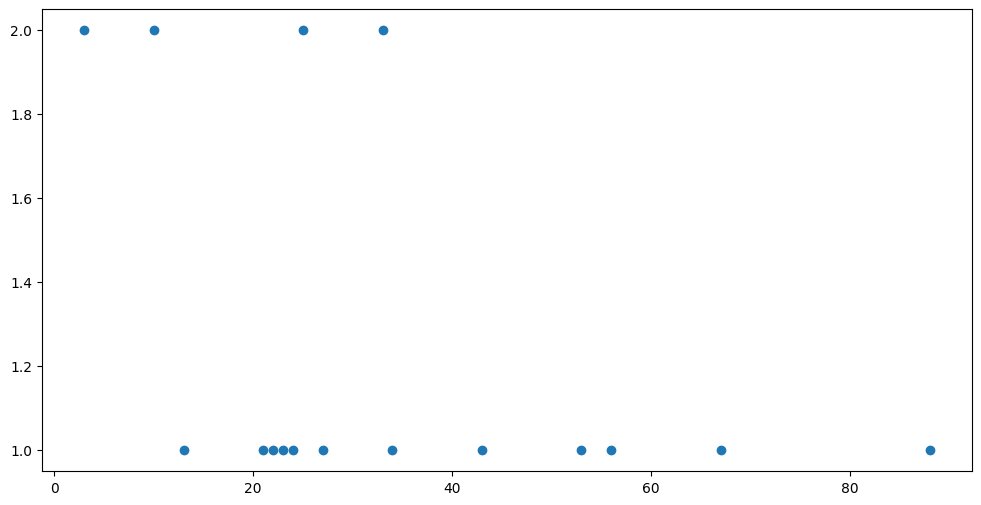

In [69]:
list_of_birthdays = list(request("SELECT birthday FROM phone_book"))
age_repeat = {}
for date in list_of_birthdays:
    birthday = date[0].split("-")
    age = 2023 - int(birthday[0])
    if age not in age_repeat:
        age_repeat[age] = 1
    else:
        age_repeat[age] += 1

plt.figure(figsize=(12,6))
plt.scatter(age_repeat.keys(),age_repeat.values())


(array([2., 1., 6., 2., 1., 1., 1., 1., 0., 1.]),
 array([ 3. , 11.5, 20. , 28.5, 37. , 45.5, 54. , 62.5, 71. , 79.5, 88. ]),
 <BarContainer object of 10 artists>)

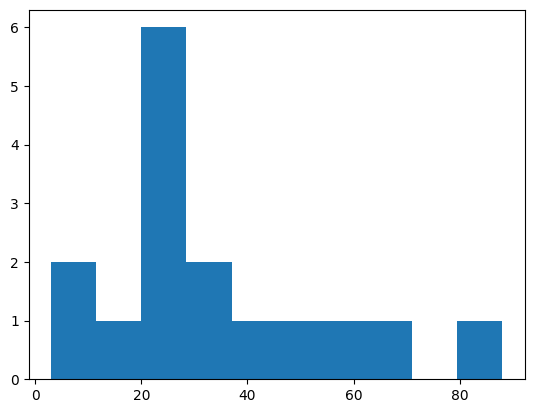

In [70]:
fig, axs = plt.subplots()
axs.hist(age_repeat.keys(), bins=10)